In [2]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import os

# Paso 2: Configurar opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)  # Ancho máximo
pd.set_option('display.max_colwidth', 30)  # Ancho de cada columna (ajusta según necesites)
pd.set_option('display.float_format', '{:.4f}'.format)  # Formato para números decimales

# Paso 3: Leer el archivo CSV desde la carpeta local del proyecto
ruta_archivo = 'Dataset_VIH_vs_Sano_v3.csv'

try:
    # Cargar el dataset
    df = pd.read_csv(ruta_archivo)
    
    print("="*80)
    print("✅ ARCHIVO CARGADO EXITOSAMENTE")
    print("="*80)
    
    # Información básica del dataset
    print(f"\n📊 INFORMACIÓN GENERAL:")
    print(f"   • Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   • Total de datos: {df.size} celdas")
    print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Vista previa de los datos
    print(f"\n👁️ VISTA PREVIA (primeras 10 filas):")
    print("="*80)
    print(df.head(10).to_string())
    
    print(f"\n👁️ ÚLTIMAS 5 FILAS:")
    print("="*80)
    print(df.tail(5).to_string())
    
    # Información de columnas
    print(f"\n📋 INFORMACIÓN DE COLUMNAS:")
    print("="*80)
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col:30s} | Tipo: {str(df[col].dtype):10s} | No nulos: {df[col].count():6d} | Únicos: {df[col].nunique():4d}")
    
    # Estadísticas descriptivas
    print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS (columnas numéricas):")
    print("="*80)
    print(df.describe().round(4).to_string())
    
    # Información de valores nulos
    print(f"\n🔍 VALORES NULOS POR COLUMNA:")
    print("="*80)
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        nulos_df = pd.DataFrame({
            'Columna': nulos.index,
            'Valores Nulos': nulos.values,
            'Porcentaje': (nulos.values / len(df) * 100).round(2)
        })
        nulos_df = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
        print(nulos_df.to_string(index=False))
    else:
        print("No hay valores nulos en el dataset")
    
    # Distribución de la variable objetivo (si existe 'VIH' o similar)
    posibles_objetivos = ['VIH', 'target', 'clase', 'grupo', 'diagnostico', 'enfermedad']
    for col in df.columns:
        if any(palabra in col.lower() for palabra in posibles_objetivos):
            print(f"\n🎯 DISTRIBUCIÓN DE VARIABLE OBJETIVO '{col}':")
            print("="*80)
            print(df[col].value_counts().to_string())
            print(f"\nPorcentajes:")
            print((df[col].value_counts(normalize=True) * 100).round(2).to_string())
            break
    
    # Si quieres ver el dataset completo (solo si es pequeño)
    if df.shape[0] < 100:
        print(f"\n📄 DATASET COMPLETO ({df.shape[0]} filas):")
        print("="*80)
        print(df.to_string())
    else:
        print(f"\n💡 El dataset tiene {df.shape[0]} filas. Para verlo completo:")
        print("   • Usa 'print(df.to_string())' - NO RECOMENDADO (puede colapsar)")
        print("   • Guarda en CSV: df.to_csv('dataset_completo.csv')")
        print("   • Usa el explorador de variables de VS Code")
    
except FileNotFoundError:
    print(f"\n❌ Error: No se encontró el archivo en {ruta_archivo}")
    # Verificar qué hay en la carpeta actual
    if os.path.exists(ruta_archivo):
        print(f"\nArchivo encontrado en: {os.path.abspath(ruta_archivo)}")
    else:
        print("\nArchivos CSV encontrados en la carpeta actual:")
        archivos_csv = [f for f in os.listdir('.') if f.endswith('.csv')]
        if archivos_csv:
            for i, archivo in enumerate(archivos_csv, 1):
                print(f"  {i}. {archivo}")
        else:
            print("  No se encontraron archivos CSV en la carpeta actual")
    
    print(f"\nDirectorio actual: {os.getcwd()}")

except Exception as e:
    print(f"\n❌ Ocurrió un error inesperado: {e}")
    import traceback
    traceback.print_exc()

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO")
print("="*80)

✅ ARCHIVO CARGADO EXITOSAMENTE

📊 INFORMACIÓN GENERAL:
   • Dimensiones: 120 filas × 10 columnas
   • Total de datos: 1200 celdas
   • Memoria utilizada: 0.04 MB

👁️ VISTA PREVIA (primeras 10 filas):
     Sexo Adherencia_Tratamiento Tipo_Tratamiento  Edad  Carga_Viral_Log  Carga_Viral_Ajustada   CD4 Nivel_Riesgo_Conductual      Ocupacion Clase
0  Hombre                   Alta            ARV_B    41           5.1200                5.2674  1040                Muy Bajo     Estudiante   VIH
1   Mujer                  Media            ARV_B    69           5.1200                5.4757   718                Muy Alto  Independiente   VIH
2  Hombre                   Baja            ARV_B    28           5.1200                5.4043   258                    Bajo     Estudiante   VIH
3  Hombre                   Alta            ARV_A    66           9.1200                9.4254  1084                Muy Bajo     Estudiante   VIH
4  Hombre                  Media            ARV_B    25           5.19

Leyendo DataSet

Matplotlib is building the font cache; this may take a moment.


🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET

📊 1. TIPOS DE DATOS POR COLUMNA
------------------------------------------------------------


,Columna,Tipo de Dato,Tipo_Detallado,Valores_Unicos,Ejemplo
0,Sexo,object,str,2,Hombre
1,Adherencia_Tratamiento,object,str,3,Alta
2,Tipo_Tratamiento,object,str,2,ARV_B
3,Edad,int64,int,52,41
4,Carga_Viral_Log,float64,float,105,5.1200
5,Carga_Viral_Ajustada,float64,float,120,5.2674
6,CD4,int64,int,110,1040
7,Nivel_Riesgo_Conductual,object,str,5,Muy Bajo
8,Ocupacion,object,str,5,Estudiante
9,Clase,object,str,2,VIH



📊 RESUMEN DE TIPOS DE DATOS:
object     6
int64      2
float64    2
Name: count, dtype: int64

📌 Columnas numéricas (4): ['Edad', 'Carga_Viral_Log', 'Carga_Viral_Ajustada', 'CD4']
📌 Columnas categóricas (6): ['Sexo', 'Adherencia_Tratamiento', 'Tipo_Tratamiento', 'Nivel_Riesgo_Conductual', 'Ocupacion', 'Clase']
📌 Columnas booleanas (0): []

🔍 2. VALORES FALTANTES (NULOS)

📊 VALORES NULOS POR COLUMNA:


,Columna,Valores Nulos,Porcentaje
0,Sexo,0,0.0000
1,Adherencia_Tratamiento,0,0.0000
2,Tipo_Tratamiento,0,0.0000
3,Edad,0,0.0000
4,Carga_Viral_Log,0,0.0000
5,Carga_Viral_Ajustada,0,0.0000
6,CD4,0,0.0000
7,Nivel_Riesgo_Conductual,0,0.0000
8,Ocupacion,0,0.0000
9,Clase,0,0.0000



📌 TOTAL DE VALORES NULOS: 0 de 1200 celdas (0.00%)
📌 COLUMNAS CON NULOS: 0 de 10 columnas

📌 FILAS CON ALGÚN VALOR NULO: 0 de 120 filas (0.00%)

🔍 3. DATOS DUPLICADOS

📊 FILAS DUPLICADAS EXACTAS: 0 de 120 filas (0.00%)

📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: 0 (0.00%)

📌 La columna 'Carga_Viral_Ajustada' tiene valores únicos (posible identificador)

🔍 4. ANÁLISIS DE CONSISTENCIA

📊 CONSISTENCIA ENTRE CARGAS VIRALES:
   • Registros con diferencia >10%: 120 de 120 (100.00%)

📊 VERIFICACIÓN DE RANGOS LÓGICOS:
   • Edad (0-120 años): 0 valores fuera de rango
   • CD4 (0-2000 células/mm³): 0 valores fuera de rango
   • Carga Viral Log (0-10): 0 valores fuera de rango

🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 DISTRIBUCIÓN DE 'Sexo':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Mujer,70,58.3333
1,Hombre,50,41.6667



📊 DISTRIBUCIÓN DE 'Adherencia_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alta,46,38.3333
1,Baja,45,37.5000
2,Media,29,24.1667



📊 DISTRIBUCIÓN DE 'Tipo_Tratamiento':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,ARV_B,62,51.6667
1,ARV_A,58,48.3333



📊 DISTRIBUCIÓN DE 'Nivel_Riesgo_Conductual':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Alto,28,23.3333
1,Muy Alto,26,21.6667
2,Muy Bajo,24,20.0000
3,Bajo,22,18.3333
4,Moderado,20,16.6667



📊 DISTRIBUCIÓN DE 'Ocupacion':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,Desempleado,28,23.3333
1,Estudiante,25,20.8333
2,Independiente,25,20.8333
3,Jubilado,24,20.0000
4,Empleado,18,15.0000



📊 DISTRIBUCIÓN DE 'Clase':
----------------------------------------


,Categoría,Frecuencia,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


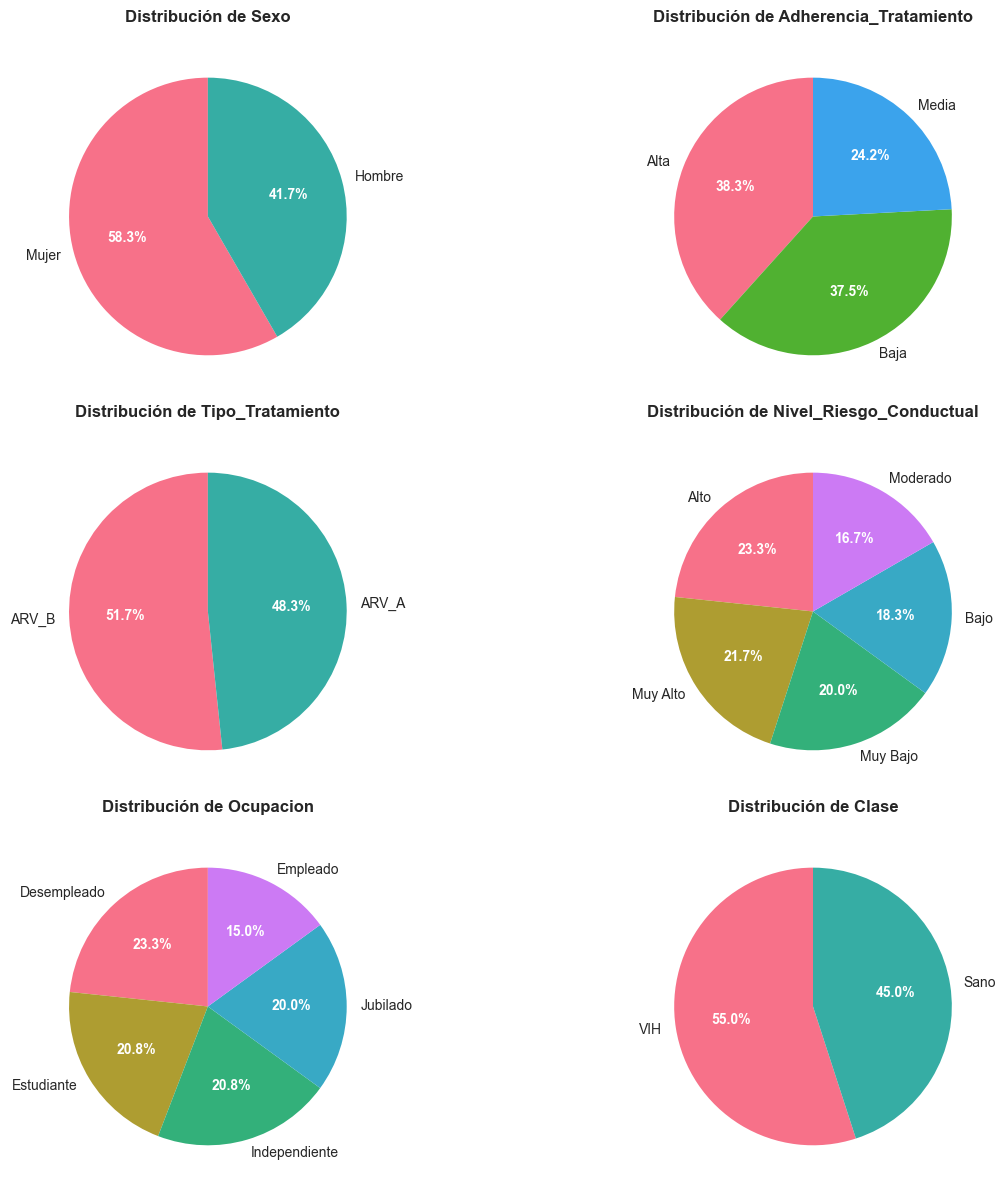


📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)


,Variable,Media,Mediana,Std,Mín,Máx,Q1,Q3
0,Edad,48.1500,50.0000,14.8390,19.0000,73.0000,38.0000,60.2500
1,Carga_Viral_Log,4.6104,4.6100,1.2419,0.6100,9.1200,3.7725,5.3400
2,Carga_Viral_Ajustada,4.8426,4.8001,1.3016,0.7296,9.4254,3.8819,5.6265
3,CD4,731.5833,812.0000,309.0903,150.0000,1196.0000,518.2500,976.5000


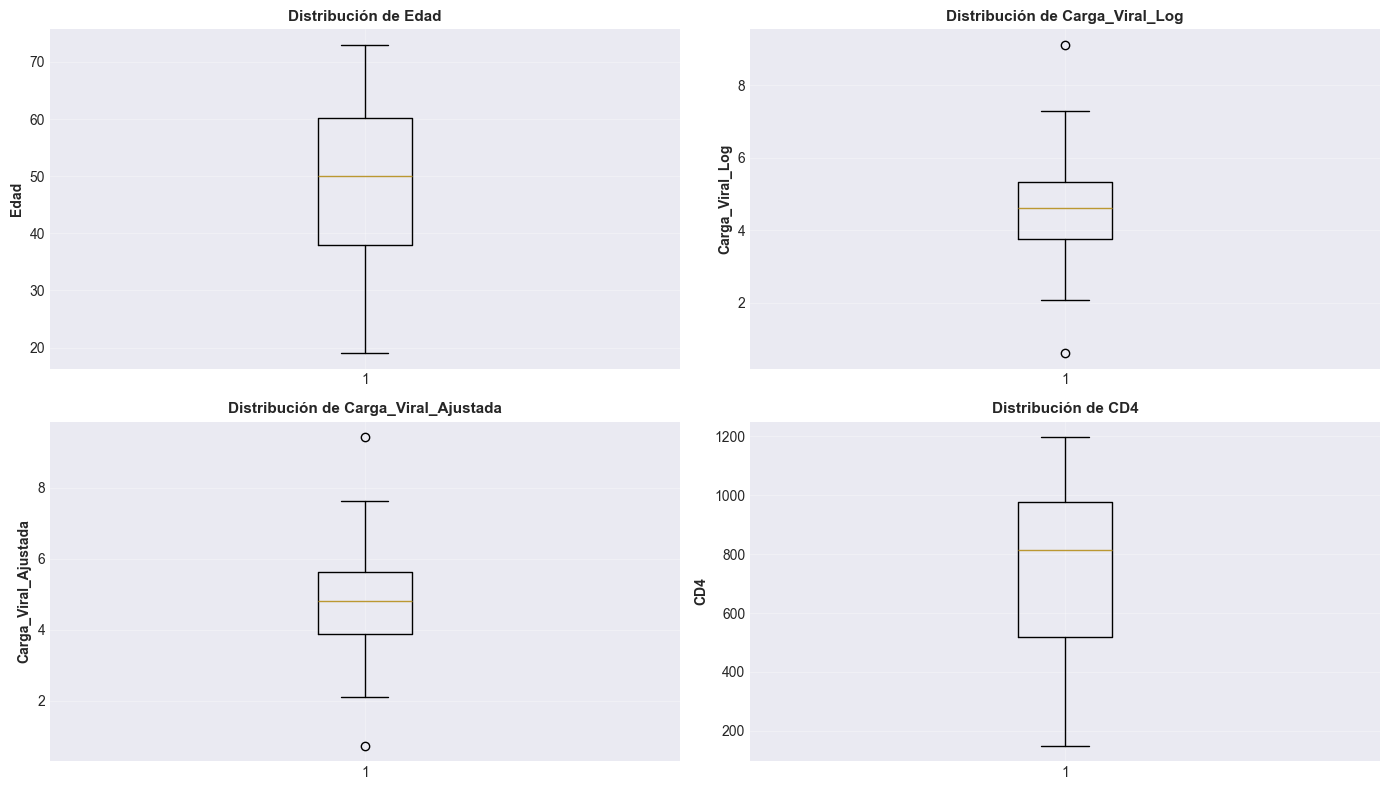


🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO

📊 DISTRIBUCIÓN DE CLASES:
----------------------------------------


,Clase,Cantidad,Porcentaje (%)
0,VIH,66,55.0000
1,Sano,54,45.0000


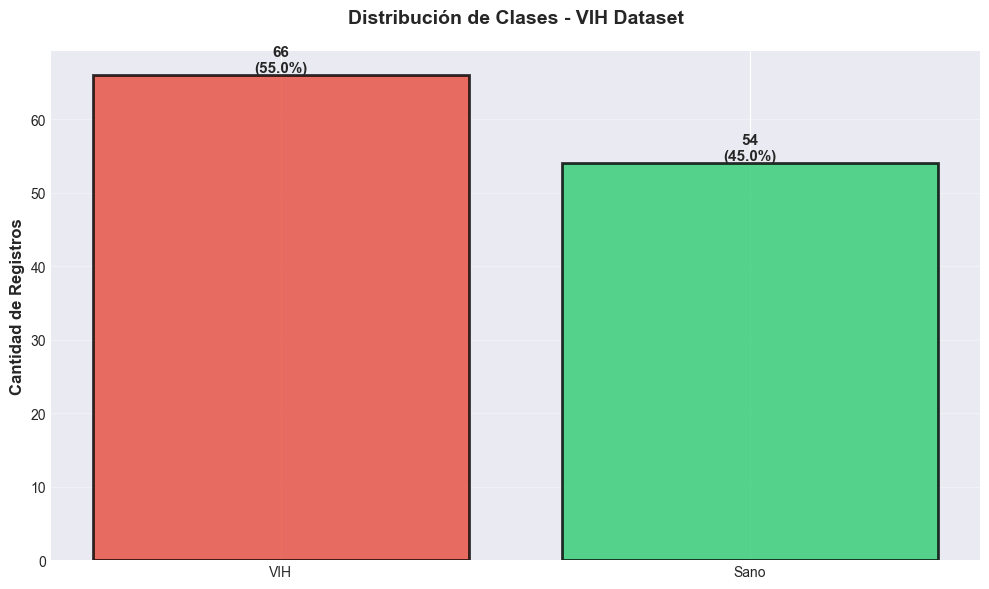


✅ LAS CLASES ESTÁN RELATIVAMENTE BALANCEADAS

📋 RESUMEN FINAL DEL ANÁLISIS - VIH DATASET


,Métrica,Valor
0,Total de Filas,120
1,Total de Columnas,10
2,Total de Celdas,1200
3,Valores Nulos Totales,0
4,% Valores Nulos,0.00%
5,Columnas con Nulos,0
6,Filas con Nulos,0
7,% Filas con Nulos,0.00%
8,Filas Duplicadas,0
9,% Filas Duplicadas,0.00%



💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:
------------------------------------------------------------

✅ VARIABLES NUMÉRICAS:
  • Estandarizar/normalizar para modelos ML
  • Verificar outliers con boxplots
  • Analizar correlaciones entre variables numéricas

✅ VARIABLES CATEGÓRICAS:
  • One-hot encoding para modelos ML
  • Label encoding si hay orden (Adherencia, Riesgo)
  • Verificar categorías poco frecuentes

✅ CONSISTENCIA DE DATOS:
  • Revisar 120 registros con inconsistencia en carga viral

✅ ANÁLISIS DE TIPOS, NULOS Y DUPLICADOS COMPLETADO


In [4]:
# Continuando con el df que ya cargaste
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("🔍 ANÁLISIS DETALLADO DE DATOS - VIH DATASET")
print("="*80)

# 1. ANÁLISIS DE TIPOS DE DATOS
print("\n📊 1. TIPOS DE DATOS POR COLUMNA")
print("-"*60)

# Crear un DataFrame con información de tipos
tipos_df = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes.values,
    'Tipo_Detallado': [df[col].apply(type).iloc[0].__name__ if len(df) > 0 else 'Unknown' for col in df.columns],
    'Valores_Unicos': [df[col].nunique() for col in df.columns],
    'Ejemplo': [df[col].iloc[0] if len(df) > 0 else 'No hay datos' for col in df.columns]
})
display(tipos_df)

# Resumen de tipos de datos
print("\n📊 RESUMEN DE TIPOS DE DATOS:")
print(df.dtypes.value_counts())

# Clasificar columnas por tipo
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
booleanas = df.select_dtypes(include=['bool']).columns.tolist()

print(f"\n📌 Columnas numéricas ({len(numericas)}): {numericas}")
print(f"📌 Columnas categóricas ({len(categoricas)}): {categoricas}")
print(f"📌 Columnas booleanas ({len(booleanas)}): {booleanas}")

# 2. ANÁLISIS DE VALORES FALTANTES
print("\n" + "="*80)
print("🔍 2. VALORES FALTANTES (NULOS)")
print("="*80)

# Calcular valores nulos
nulos = df.isnull().sum()
nulos_porcentaje = (nulos / len(df)) * 100

# Crear DataFrame de nulos
nulos_df = pd.DataFrame({
    'Columna': nulos.index,
    'Valores Nulos': nulos.values,
    'Porcentaje': nulos_porcentaje.values
})
nulos_df = nulos_df.sort_values('Valores Nulos', ascending=False)

print("\n📊 VALORES NULOS POR COLUMNA:")
display(nulos_df)

# Visualizar valores nulos con gráfico
if nulos_df['Valores Nulos'].sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    nulos_df_plot = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=True)
    colors = plt.cm.RdYlGn_r(nulos_df_plot['Porcentaje'] / nulos_df_plot['Porcentaje'].max())
    bars = ax.barh(nulos_df_plot['Columna'], nulos_df_plot['Valores Nulos'], color=colors)
    ax.set_xlabel('Cantidad de Valores Nulos', fontsize=12, fontweight='bold')
    ax.set_title('Distribución de Valores Nulos por Columna', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Agregar valores en las barras
    for i, (bar, val, pct) in enumerate(zip(bars, nulos_df_plot['Valores Nulos'], nulos_df_plot['Porcentaje'])):
        ax.text(val, bar.get_y() + bar.get_height()/2, f' {val} ({pct:.1f}%)', 
                va='center', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

# Resumen de nulos
total_nulos = nulos.sum()
print(f"\n📌 TOTAL DE VALORES NULOS: {total_nulos} de {df.size} celdas ({total_nulos/df.size*100:.2f}%)")
print(f"📌 COLUMNAS CON NULOS: {len(nulos[nulos > 0])} de {len(df.columns)} columnas")

# Filas con nulos
filas_con_nulos = df[df.isnull().any(axis=1)]
print(f"\n📌 FILAS CON ALGÚN VALOR NULO: {len(filas_con_nulos)} de {len(df)} filas ({len(filas_con_nulos)/len(df)*100:.2f}%)")

# Mostrar algunas filas con nulos (si existen)
if len(filas_con_nulos) > 0:
    print("\n🔍 EJEMPLOS DE FILAS CON VALORES NULOS (primeras 5):")
    display(filas_con_nulos.head())

# 3. ANÁLISIS DE DATOS DUPLICADOS
print("\n" + "="*80)
print("🔍 3. DATOS DUPLICADOS")
print("="*80)

# Verificar filas duplicadas
duplicados_totales = df.duplicated().sum()
print(f"\n📊 FILAS DUPLICADAS EXACTAS: {duplicados_totales} de {len(df)} filas ({duplicados_totales/len(df)*100:.2f}%)")

# Mostrar filas duplicadas si existen
if duplicados_totales > 0:
    print("\n🔍 EJEMPLOS DE FILAS DUPLICADAS (primeras 5):")
    display(df[df.duplicated(keep=False)].sort_values(df.columns[0]).head())

# Verificar duplicados en combinaciones clave (sin incluir la variable objetivo)
columnas_sin_clase = [col for col in df.columns if col != 'Clase']
duplicados_sin_clase = df.duplicated(subset=columnas_sin_clase).sum()
print(f"\n📊 FILAS CON MISMOS DATOS PERO DIFERENTE CLASE: {duplicados_sin_clase} ({duplicados_sin_clase/len(df)*100:.2f}%)")

# Verificar duplicados en identificadores únicos potenciales
for col in df.columns:
    if df[col].nunique() == len(df):
        print(f"\n📌 La columna '{col}' tiene valores únicos (posible identificador)")

# 4. ANÁLISIS DE CONSISTENCIA DE DATOS
print("\n" + "="*80)
print("🔍 4. ANÁLISIS DE CONSISTENCIA")
print("="*80)

# Verificar consistencia entre Carga_Viral_Log y Carga_Viral_Ajustada
inconsistencias_carga = 0
if 'Carga_Viral_Log' in df.columns and 'Carga_Viral_Ajustada' in df.columns:
    df['Carga_Calculada'] = 10 ** df['Carga_Viral_Log']
    df['Diferencia_Carga'] = abs(df['Carga_Viral_Ajustada'] - df['Carga_Calculada'])
    
    inconsistencias_carga = len(df[df['Diferencia_Carga'] > df['Carga_Calculada'] * 0.1])
    print(f"\n📊 CONSISTENCIA ENTRE CARGAS VIRALES:")
    print(f"   • Registros con diferencia >10%: {inconsistencias_carga} de {len(df)} ({inconsistencias_carga/len(df)*100:.2f}%)")
    
    df = df.drop(['Carga_Calculada', 'Diferencia_Carga'], axis=1)

# Verificar rangos lógicos para variables numéricas
print("\n📊 VERIFICACIÓN DE RANGOS LÓGICOS:")

if 'Edad' in df.columns:
    edad_fuera_rango = len(df[(df['Edad'] < 0) | (df['Edad'] > 120)])
    print(f"   • Edad (0-120 años): {edad_fuera_rango} valores fuera de rango")

if 'CD4' in df.columns:
    cd4_fuera_rango = len(df[(df['CD4'] < 0) | (df['CD4'] > 2000)])
    print(f"   • CD4 (0-2000 células/mm³): {cd4_fuera_rango} valores fuera de rango")

if 'Carga_Viral_Log' in df.columns:
    carga_log_fuera_rango = len(df[(df['Carga_Viral_Log'] < 0) | (df['Carga_Viral_Log'] > 10)])
    print(f"   • Carga Viral Log (0-10): {carga_log_fuera_rango} valores fuera de rango")

# 5. ANÁLISIS DE VARIABLES CATEGÓRICAS
print("\n" + "="*80)
print("🔍 5. ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

n_cols = min(2, len(categoricas))
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=min(2, len(categoricas)), 
                          figsize=(14, 4 * ((len(categoricas) + 1) // 2)))
if len(categoricas) == 1:
    axes = [axes]
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for idx, col in enumerate(categoricas):
    print(f"\n📊 DISTRIBUCIÓN DE '{col}':")
    print("-"*40)
    
    frecuencias = df[col].value_counts()
    porcentajes = df[col].value_counts(normalize=True) * 100
    
    distribucion = pd.DataFrame({
        'Categoría': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje (%)': porcentajes.values
    })
    display(distribucion)
    
    # Gráfico de pastel
    if idx < len(axes):
        colors = sns.color_palette("husl", len(frecuencias))
        wedges, texts, autotexts = axes[idx].pie(frecuencias.values, 
                                                    labels=frecuencias.index,
                                                    autopct='%1.1f%%',
                                                    colors=colors,
                                                    startangle=90)
        axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold', pad=15)
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
    
    # Verificar categorías con valores extraños
    if col == 'Sexo':
        valores_esperados = ['Hombre', 'Mujer']
        valores_extranos = [v for v in df[col].unique() if v not in valores_esperados]
        if valores_extranos:
            print(f"⚠️ Valores inesperados en {col}: {valores_extranos}")
    elif col == 'Clase':
        valores_esperados = ['VIH', 'Sano']
        valores_extranos = [v for v in df[col].unique() if v not in valores_esperados]
        if valores_extranos:
            print(f"⚠️ Valores inesperados en {col}: {valores_extranos}")

# Ocultar ejes sobrantes
for idx in range(len(categoricas), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 6. ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
print("\n" + "="*80)
print("📊 6. ESTADÍSTICAS DESCRIPTIVAS (VARIABLES NUMÉRICAS)")
print("="*80)

if len(numericas) > 0:
    stats_data = []
    for col in numericas:
        stats_data.append({
            'Variable': col,
            'Media': f"{df[col].mean():.4f}",
            'Mediana': f"{df[col].median():.4f}",
            'Std': f"{df[col].std():.4f}",
            'Mín': f"{df[col].min():.4f}",
            'Máx': f"{df[col].max():.4f}",
            'Q1': f"{df[col].quantile(0.25):.4f}",
            'Q3': f"{df[col].quantile(0.75):.4f}"
        })
    
    stats_df = pd.DataFrame(stats_data)
    display(stats_df)
    
    # Visualizar distribuciones con boxplots
    fig, axes = plt.subplots(nrows=(len(numericas) + 1) // 2, ncols=min(2, len(numericas)),
                              figsize=(14, 4 * ((len(numericas) + 1) // 2)))
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    for idx, col in enumerate(numericas):
        if idx < len(axes):
            # Boxplot
            axes[idx].boxplot(df[col].dropna(), vert=True)
            axes[idx].set_ylabel(col, fontweight='bold')
            axes[idx].set_title(f'Distribución de {col}', fontweight='bold', fontsize=11)
            axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(numericas), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 7. ANÁLISIS DE LA VARIABLE OBJETIVO (Clase)
print("\n" + "="*80)
print("🎯 7. ANÁLISIS DE LA VARIABLE OBJETIVO")
print("="*80)

if 'Clase' in df.columns:
    print(f"\n📊 DISTRIBUCIÓN DE CLASES:")
    print("-"*40)
    
    conteo_clases = df['Clase'].value_counts()
    porcentaje_clases = df['Clase'].value_counts(normalize=True) * 100
    
    clase_df = pd.DataFrame({
        'Clase': conteo_clases.index,
        'Cantidad': conteo_clases.values,
        'Porcentaje (%)': porcentaje_clases.values
    })
    display(clase_df)
    
    # Gráfico de barras para clases
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#2ecc71' if clase == 'Sano' else '#e74c3c' for clase in conteo_clases.index]
    bars = ax.bar(conteo_clases.index, conteo_clases.values, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
    
    ax.set_ylabel('Cantidad de Registros', fontsize=12, fontweight='bold')
    ax.set_title('Distribución de Clases - VIH Dataset', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for bar, val, pct in zip(bars, conteo_clases.values, porcentaje_clases.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val}\n({pct:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Verificar balanceo de clases
    min_clase = porcentaje_clases.min()
    max_clase = porcentaje_clases.max()
    
    if max_clase / min_clase > 1.5:
        print(f"\n⚠️ LAS CLASES ESTÁN DESBALANCEADAS (relación {max_clase/min_clase:.2f}:1)")
        print("   Considera usar técnicas de balanceo como SMOTE o pesos de clase")
    else:
        print(f"\n✅ LAS CLASES ESTÁN RELATIVAMENTE BALANCEADAS")

# 8. RESUMEN FINAL
print("\n" + "="*80)
print("📋 RESUMEN FINAL DEL ANÁLISIS - VIH DATASET")
print("="*80)

resumen_data = {
    'Métrica': [
        'Total de Filas',
        'Total de Columnas',
        'Total de Celdas',
        'Valores Nulos Totales',
        '% Valores Nulos',
        'Columnas con Nulos',
        'Filas con Nulos',
        '% Filas con Nulos',
        'Filas Duplicadas',
        '% Filas Duplicadas',
        'Variables Numéricas',
        'Variables Categóricas',
        'Variables Booleanas'
    ],
    'Valor': [
        len(df),
        len(df.columns),
        df.size,
        total_nulos,
        f"{total_nulos/df.size*100:.2f}%",
        len(nulos[nulos > 0]),
        len(filas_con_nulos),
        f"{len(filas_con_nulos)/len(df)*100:.2f}%",
        duplicados_totales,
        f"{duplicados_totales/len(df)*100:.2f}%",
        len(numericas),
        len(categoricas),
        len(booleanas)
    ]
}

resumen_df = pd.DataFrame(resumen_data)
display(resumen_df)

# 9. RECOMENDACIONES
print("\n💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS:")
print("-"*60)

if total_nulos > 0:
    print("✅ VALORES NULOS:")
    print("  • Eliminar filas/columnas con muchos nulos")
    print("  • Imputar valores (media para numéricas, moda para categóricas)")
    print("  • Considerar si los nulos tienen significado (ej: 0 implícito)")

if duplicados_totales > 0:
    print("\n✅ DATOS DUPLICADOS:")
    print("  • df.drop_duplicates() para eliminar duplicados exactos")
    print("  • Verificar si duplicados sin Clase son errores o datos válidos")

if len(numericas) > 0:
    print("\n✅ VARIABLES NUMÉRICAS:")
    print("  • Estandarizar/normalizar para modelos ML")
    print("  • Verificar outliers con boxplots")
    print("  • Analizar correlaciones entre variables numéricas")

if len(categoricas) > 0:
    print("\n✅ VARIABLES CATEGÓRICAS:")
    print("  • One-hot encoding para modelos ML")
    print("  • Label encoding si hay orden (Adherencia, Riesgo)")
    print("  • Verificar categorías poco frecuentes")

if 'Carga_Viral_Log' in df.columns and 'Carga_Viral_Ajustada' in df.columns and inconsistencias_carga > 0:
    print("\n✅ CONSISTENCIA DE DATOS:")
    print(f"  • Revisar {inconsistencias_carga} registros con inconsistencia en carga viral")

print("\n" + "="*80)
print("✅ ANÁLISIS DE TIPOS, NULOS Y DUPLICADOS COMPLETADO")
print("="*80)